# <center> Optimal Stock Level Analysis </center>

<font color='Blue'>

## 1. Setup and Data Loading
    
</font>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading datasets

beginning_inventory = pd.read_csv('Beginning_Inventory_Dec_31_2016.csv')
vendor_purchase_price = pd.read_csv('Vendor_Purchase_Prices_Dec_2017.csv')
ending_inventory = pd.read_csv('Ending_Inventory_Dec_31_2016.csv')
invoice_purchase = pd.read_csv('Invoice_Purchases_Dec_31_2016.csv')
purchase = pd.read_csv('Purchases_Dec_31_2016.csv')
sales = pd.read_csv('Sales_Dec_31_2016.csv')

In [3]:
beginning_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [4]:
vendor_purchase_price.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [5]:
ending_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [6]:
invoice_purchase.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [7]:
purchase.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [8]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY



<font color='Blue'>

## 2. Data cleaning
    
</font>


In [9]:
# Function to Check & Report missing value in each dataframe

def check_missing_values(df, df_name):
    print(f'\nmissing values in {df_name}')
    missing_values = df.isnull().sum()                        # Sum of missing values in each column
    missing_values = missing_values[missing_values > 0]       # Filter out columns with no missing values
    if missing_values.empty:
        print('No missing values found')
    else:
        print(missing_values)
        
# Applying the function to each dataset

datasets = {
    'Vendor Puchase Prices': vendor_purchase_price,
    'Beginning Inventory': beginning_inventory,
    'Ending Inventory': ending_inventory,
    'Invoice Purchase': invoice_purchase,
    'Purchases': purchase,
    'Sales': sales
}

for name, dataset in datasets.items():
    check_missing_values(dataset,name)
    


missing values in Vendor Puchase Prices
Description    1
Size           1
Volume         1
dtype: int64

missing values in Beginning Inventory
No missing values found

missing values in Ending Inventory
City    1284
dtype: int64

missing values in Invoice Purchase
Approval    5169
dtype: int64

missing values in Purchases
Size    3
dtype: int64

missing values in Sales
No missing values found


In [10]:
# Ending Inventory
# See if we can use the store column to fill the city field
missing_city = ending_inventory[ending_inventory['City'].isnull()]

# Group by 'Store' and count of missing value
missing_city_grouped = missing_city.groupby('Store').size().reset_index(name='Missing_City_Count')
missing_city_grouped = missing_city_grouped.sort_values(by='Missing_City_Count', ascending = False)
missing_city_grouped

,Store,Missing_City_Count
0,46,1284


In [11]:
# Ending Inventory
# Replacing missing 'City' values with 'Unknown'

ending_inventory['City'].fillna('Unknown', inplace=True)

In [12]:
# Vendor Purchase Price
# Removing rows with missing values in 'Description', 'Size' and 'Volume'

vendor_purchase_price.dropna(subset=['Description', 'Size', 'Volume'], inplace=True)

In [13]:
# Invoice Purchase
# See the distinct values of the 'Approval' column
invoice_purchase['Approval'].unique()

array([nan, 'Frank Delahunt'], dtype=object)

In [14]:
# Invoice Purchase
# Replacing missing 'Approval' values with 'Unknown'

invoice_purchase['Approval'].fillna('Unknown', inplace=True)

In [15]:
# Purchases
# Removing rows with missing values in 'Size'
purchase.dropna(subset=['Size'], inplace=True)

In [16]:
# Check again missing value in each dataframe

datasets = {
    'Vendor Puchase Prices': vendor_purchase_price,
    'Beginning Inventory': beginning_inventory,
    'Ending Inventory': ending_inventory,
    'Invoice Purchase': invoice_purchase,
    'Purchases': purchase,
    'Sales': sales
}

for name, dataset in datasets.items():
    check_missing_values(dataset,name)
    


missing values in Vendor Puchase Prices
No missing values found

missing values in Beginning Inventory
No missing values found

missing values in Ending Inventory
No missing values found

missing values in Invoice Purchase
No missing values found

missing values in Purchases
No missing values found

missing values in Sales
No missing values found



<font color='Blue'>

## 3. Consolidating datasets
    
</font>

In [17]:
numerical_summary = beginning_inventory[['onHand', 'Price']].describe()
numerical_summary

,onHand,Price
count,206529.000000,206529.000000
mean,20.429455,22.253910
std,31.467342,70.178964
min,0.000000,0.000000
25%,7.000000,9.990000
50%,12.000000,14.990000
75%,21.000000,21.990000
max,1251.000000,13999.900000


In [18]:
# Summarize total purchase for each item
total_purchases = purchase.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'Size'])['Quantity'].sum().reset_index()
total_purchases.rename(columns={'Quantity' : 'Total_Purchased'}, inplace=True)

# Summarize total sales for each item
total_sales = sales.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'Size'])['SalesQuantity'].sum().reset_index()
total_sales.rename(columns={'SalesQuantity' : 'Total_Sold'}, inplace=True)

In [19]:
# Merge Beginning and Ending Inventory
inventory = pd.merge(beginning_inventory, ending_inventory,
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'],
                     how='outer',
                     suffixes=('_beg', '_end'))

# Merge Summarized Purchases
inventory = pd.merge(inventory, total_purchases,
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'],
                     how='left')

# Merge Summarized Sales
inventory = pd.merge(inventory, total_sales,
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'],
                     how='left')
inventory.head()

,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,Total_Purchased,Total_Sold
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8.0,12.99,2016-01-01,HARDERSFIELD,11.0,12.99,2016-12-31,105.0,11.0
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7.0,10.99,2016-01-01,NaN,NaN,NaN,NaN,36.0,7.0
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6.0,36.99,2016-01-01,HARDERSFIELD,7.0,36.99,2016-12-31,116.0,20.0
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3.0,38.99,2016-01-01,HARDERSFIELD,7.0,38.99,2016-12-31,59.0,9.0
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6.0,34.99,2016-01-01,HARDERSFIELD,4.0,34.99,2016-12-31,NaN,NaN


In [20]:
# Fill Nan values with 0 for Total_Purchased and Total_Sold
inventory['Total_Purchased'].fillna(0, inplace=True)
inventory['Total_Sold'].fillna(0,inplace=True)

In [21]:
# Calculate the total 'onHand' for the original Beginning Inventory
total_beg_inventory_original = beginning_inventory['onHand'].sum()

# Calculate the total 'onHand_beg' for the merged dataframe
total_beg_inventory_merged = inventory['onHand_beg'].sum()

# Calculate the total 'onHand' for the original Ending Inventory
total_end_inv_original = ending_inventory['onHand'].sum()

# Calculate the total 'onHand_end' for the merged dataframe
total_end_inv_merged = inventory['onHand_end'].sum()

# Print and check the comparison of both results for Beginning Inventory and Ending Inventory
print(total_beg_inventory_original, ' vs ',total_beg_inventory_merged )
print(total_end_inv_original, ' vs ', total_end_inv_merged)


4219275  vs  4219275.0
4885776  vs  4885776.0


In [22]:
# Calculate the expected ending inventory for each item
inventory['Expected_onHand_end'] = inventory['onHand_beg'] + inventory['Total_Purchased'] - inventory['Total_Sold']

# Identify items where the expected ending inventory doesn't match the reported ending inventory
discrepancies = inventory[inventory['Expected_onHand_end'] != inventory['onHand_end']]

# Show the discrepancies
discrepancies

,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,Total_Purchased,Total_Sold,Expected_onHand_end
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8.0,12.99,2016-01-01,HARDERSFIELD,11.0,12.99,2016-12-31,105.0,11.0,102.0
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7.0,10.99,2016-01-01,NaN,NaN,NaN,NaN,36.0,7.0,36.0
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6.0,36.99,2016-01-01,HARDERSFIELD,7.0,36.99,2016-12-31,116.0,20.0,102.0
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3.0,38.99,2016-01-01,HARDERSFIELD,7.0,38.99,2016-12-31,59.0,9.0,53.0
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6.0,34.99,2016-01-01,HARDERSFIELD,4.0,34.99,2016-12-31,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258688,81_PEMBROKE_90087,81,NaN,90087,Ch Mouton Rothschild 12 Paui,750mL,NaN,NaN,NaN,PEMBROKE,3.0,469.99,2016-12-31,3.0,0.0,NaN
258689,81_PEMBROKE_90088,81,NaN,90088,Ch Le Petite Mouton 12 Pauil,750mL,NaN,NaN,NaN,PEMBROKE,3.0,134.99,2016-12-31,3.0,0.0,NaN
258690,81_PEMBROKE_90089,81,NaN,90089,Ch Lynch Bages 12 Pauillac,750mL,NaN,NaN,NaN,PEMBROKE,3.0,119.99,2016-12-31,3.0,0.0,NaN
258691,81_PEMBROKE_90090,81,NaN,90090,Ch Lafite Rothschild 12,750mL,NaN,NaN,NaN,PEMBROKE,3.0,649.99,2016-12-31,3.0,0.0,NaN



<font color='Blue'>

## 4. Exploratory Data Analysis
    
</font>

In [23]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258693 entries, 0 to 258692
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InventoryId          258693 non-null  object 
 1   Store                258693 non-null  int64  
 2   City_beg             206529 non-null  object 
 3   Brand                258693 non-null  int64  
 4   Description          258693 non-null  object 
 5   Size                 258693 non-null  object 
 6   onHand_beg           206529 non-null  float64
 7   Price_beg            206529 non-null  float64
 8   startDate            206529 non-null  object 
 9   City_end             224489 non-null  object 
 10  onHand_end           224489 non-null  float64
 11  Price_end            224489 non-null  float64
 12  endDate              224489 non-null  object 
 13  Total_Purchased      258693 non-null  float64
 14  Total_Sold           258693 non-null  float64
 15  Expected_onHand_e

In [24]:
inventory.describe()

,Store,Brand,onHand_beg,Price_beg,onHand_end,Price_end,Total_Purchased,Total_Sold,Expected_onHand_end
count,258693.000000,258693.000000,206529.000000,206529.000000,224489.000000,224489.000000,258693.000000,258693.000000,206529.000000
mean,43.398449,14115.134677,20.429455,22.253910,21.763988,23.585583,125.075951,9.321180,151.658886
std,23.293805,13017.666302,31.467342,70.178964,37.233576,79.202775,317.131292,26.821291,341.278979
min,1.000000,58.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.000000
25%,23.000000,3727.000000,7.000000,9.990000,7.000000,9.990000,12.000000,0.000000,24.000000
50%,45.000000,8187.000000,12.000000,14.990000,12.000000,14.990000,39.000000,2.000000,60.000000
75%,66.000000,23383.000000,21.000000,21.990000,22.000000,23.490000,120.000000,8.000000,149.000000
max,81.000000,90631.000000,1251.000000,13999.900000,3676.000000,13999.900000,12705.000000,1142.000000,12944.000000


In [25]:
inventory.isnull().sum()

InventoryId                0
Store                      0
City_beg               52164
Brand                      0
Description                0
Size                       0
onHand_beg             52164
Price_beg              52164
startDate              52164
City_end               34204
onHand_end             34204
Price_end              34204
endDate                34204
Total_Purchased            0
Total_Sold                 0
Expected_onHand_end    52164
dtype: int64

In [26]:
# Check on columns with null values and filter the DataFrame for rows where any of them have null values

rows_with_null = inventory[inventory[['City_beg','onHand_beg', 'Price_beg', 'startDate', 'City_end', 
                                      'onHand_end', 'Price_end', 'endDate', 'Expected_onHand_end']].isnull().any(axis =1)]

# Display first 10 rows with null
rows_with_null.head(10)

,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,Total_Purchased,Total_Sold,Expected_onHand_end
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7.0,10.99,2016-01-01,NaN,NaN,NaN,NaN,36.0,7.0,36.0
9,1_HARDERSFIELD_120,1,HARDERSFIELD,120,Tarantula Azul Tequila Gift,750mL,11.0,13.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,5.0,6.0
11,1_HARDERSFIELD_165,1,HARDERSFIELD,165,Gentleman Jack Gift Pack,750mL,0.0,26.99,2016-01-01,NaN,NaN,NaN,NaN,24.0,0.0,24.0
14,1_HARDERSFIELD_178,1,HARDERSFIELD,178,Wild Turkey Russell's RSV,750mL,24.0,26.99,2016-01-01,NaN,NaN,NaN,NaN,12.0,4.0,32.0
18,1_HARDERSFIELD_247,1,HARDERSFIELD,247,Gran Patron Platinum Tequil,750mL,1.0,199.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,0.0,1.0
22,1_HARDERSFIELD_281,1,HARDERSFIELD,281,Kamora Coffee Gift Pack,750mL,1.0,9.99,2016-01-01,NaN,NaN,NaN,NaN,18.0,1.0,18.0
23,1_HARDERSFIELD_283,1,HARDERSFIELD,283,Milagro Tequila Reposado SBR,750mL,4.0,57.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,2.0,2.0
27,1_HARDERSFIELD_311,1,HARDERSFIELD,311,The Glenlivet 12 Yr Gift Pk,750mL,8.0,41.99,2016-01-01,NaN,NaN,NaN,NaN,24.0,6.0,26.0
28,1_HARDERSFIELD_323,1,HARDERSFIELD,323,Tequila Rose Strawberry Gift,750mL,6.0,13.99,2016-01-01,NaN,NaN,NaN,NaN,18.0,3.0,21.0
30,1_HARDERSFIELD_356,1,HARDERSFIELD,356,Carolans Irish Cr Gift Set,750mL,0.0,11.49,2016-01-01,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [27]:
# Rows with no null values across all columns
rows_with_all_data = inventory.dropna()

# Display first 10 rows with all data
rows_with_all_data.head(10)

,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,Total_Purchased,Total_Sold,Expected_onHand_end
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8.0,12.99,2016-01-01,HARDERSFIELD,11.0,12.99,2016-12-31,105.0,11.0,102.0
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6.0,36.99,2016-01-01,HARDERSFIELD,7.0,36.99,2016-12-31,116.0,20.0,102.0
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3.0,38.99,2016-01-01,HARDERSFIELD,7.0,38.99,2016-12-31,59.0,9.0,53.0
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6.0,34.99,2016-01-01,HARDERSFIELD,4.0,34.99,2016-12-31,0.0,0.0,6.0
5,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,18.0,14.99,2016-01-01,HARDERSFIELD,7.0,14.99,2016-12-31,0.0,3.0,15.0
6,1_HARDERSFIELD_77,1,HARDERSFIELD,77,Three Olives Espresso Vodka,750mL,7.0,14.99,2016-01-01,HARDERSFIELD,18.0,14.99,2016-12-31,132.0,27.0,112.0
7,1_HARDERSFIELD_79,1,HARDERSFIELD,79,Three Olives Loopy Vodka,750mL,2.0,14.99,2016-01-01,HARDERSFIELD,7.0,14.99,2016-12-31,96.0,8.0,90.0
8,1_HARDERSFIELD_115,1,HARDERSFIELD,115,Belvedere Vodka,Liter,5.0,27.99,2016-01-01,HARDERSFIELD,35.0,27.99,2016-12-31,150.0,15.0,140.0
10,1_HARDERSFIELD_126,1,HARDERSFIELD,126,Grey Goose Vodka,Liter,17.0,29.99,2016-01-01,HARDERSFIELD,36.0,29.99,2016-12-31,530.0,36.0,511.0
12,1_HARDERSFIELD_171,1,HARDERSFIELD,171,Gentleman Jack,1.75L,12.0,49.99,2016-01-01,HARDERSFIELD,24.0,49.99,2016-12-31,96.0,17.0,91.0


In [28]:
# Filter rows where 'onHand_end' is equal to 'Expected_onHand_end'
matching_rows = inventory[inventory['onHand_end'] == inventory['Expected_onHand_end']]

# Display first 10 rows
matching_rows.head(10)

,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,Total_Purchased,Total_Sold,Expected_onHand_end
41,1_HARDERSFIELD_425,1,HARDERSFIELD,425,Hennessy Paradis,750mL,1.0,799.99,2016-01-01,HARDERSFIELD,1.0,799.99,2016-12-31,0.0,0.0,1.0
79,1_HARDERSFIELD_780,1,HARDERSFIELD,780,Svedka Clementine Vodka,Liter,14.0,12.99,2016-01-01,HARDERSFIELD,13.0,12.99,2016-12-31,0.0,1.0,13.0
101,1_HARDERSFIELD_883,1,HARDERSFIELD,883,Patron Burdeos Anejo Tequila,750mL,2.0,499.99,2016-01-01,HARDERSFIELD,2.0,499.99,2016-12-31,0.0,0.0,2.0
109,1_HARDERSFIELD_950,1,HARDERSFIELD,950,Mastersons 10 Yr Old Rye,750mL,2.0,79.99,2016-01-01,HARDERSFIELD,1.0,79.99,2016-12-31,0.0,1.0,1.0
116,1_HARDERSFIELD_1001,1,HARDERSFIELD,1001,Baileys 50mL 4 Pack,50mL 4 Pk,0.0,5.99,2016-01-01,HARDERSFIELD,0.0,5.99,2016-12-31,0.0,0.0,0.0
147,1_HARDERSFIELD_1106,1,HARDERSFIELD,1106,Aberfeldy Single Cask,750mL,8.0,229.99,2016-01-01,HARDERSFIELD,8.0,249.99,2016-12-31,0.0,0.0,8.0
175,1_HARDERSFIELD_1274,1,HARDERSFIELD,1274,No. 14 Bourbon,750mL,0.0,44.99,2016-01-01,HARDERSFIELD,0.0,44.99,2016-12-31,0.0,0.0,0.0
297,1_HARDERSFIELD_2029,1,HARDERSFIELD,2029,Springbank 10 Yr Scotch,750mL,8.0,73.99,2016-01-01,HARDERSFIELD,11.0,73.99,2016-12-31,6.0,3.0,11.0
351,1_HARDERSFIELD_2182,1,HARDERSFIELD,2182,McClelland Islay Single Mal,750mL,0.0,18.99,2016-01-01,HARDERSFIELD,12.0,19.99,2016-12-31,12.0,0.0,12.0
354,1_HARDERSFIELD_2186,1,HARDERSFIELD,2186,Label 5 Scotch 12 Yr,750mL,8.0,31.99,2016-01-01,HARDERSFIELD,7.0,31.99,2016-12-31,0.0,1.0,7.0



<font color='Blue'>

## 5. Discrepancy Analysis
    
</font>

In [29]:
inventory['Discrepancy'] = inventory['Expected_onHand_end'] - inventory['onHand_end']

inventory['Discrepancy'].describe()

count    172325.000000
mean        152.488664
std         341.055875
min        -269.000000
25%          23.000000
50%          61.000000
75%         149.000000
max       12170.000000
Name: Discrepancy, dtype: float64

In [30]:
# Calculate the price for calculation and discrepancy value
inventory["Price_for_Calculation"] = inventory["Price_end"].fillna(inventory['Price_beg'])
inventory['Discrepancy'] = pd.to_numeric(inventory['Discrepancy'], errors='coerce')
inventory['Discrepancy_Value'] = inventory['Discrepancy'] * inventory['Price_for_Calculation']

# Format the discrepancy as $ with commas
inventory['Discrepancy_Value_Dollars'] = inventory['Discrepancy_Value'].apply(lambda x: "${:,.2f}".format(x))

In [31]:
inventory.head()

,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,Total_Purchased,Total_Sold,Expected_onHand_end,Discrepancy,Price_for_Calculation,Discrepancy_Value,Discrepancy_Value_Dollars
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8.0,12.99,2016-01-01,HARDERSFIELD,11.0,12.99,2016-12-31,105.0,11.0,102.0,91.0,12.99,1182.09,"$1,182.09"
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7.0,10.99,2016-01-01,NaN,NaN,NaN,NaN,36.0,7.0,36.0,NaN,10.99,NaN,$nan
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6.0,36.99,2016-01-01,HARDERSFIELD,7.0,36.99,2016-12-31,116.0,20.0,102.0,95.0,36.99,3514.05,"$3,514.05"
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3.0,38.99,2016-01-01,HARDERSFIELD,7.0,38.99,2016-12-31,59.0,9.0,53.0,46.0,38.99,1793.54,"$1,793.54"
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6.0,34.99,2016-01-01,HARDERSFIELD,4.0,34.99,2016-12-31,0.0,0.0,6.0,2.0,34.99,69.98,$69.98


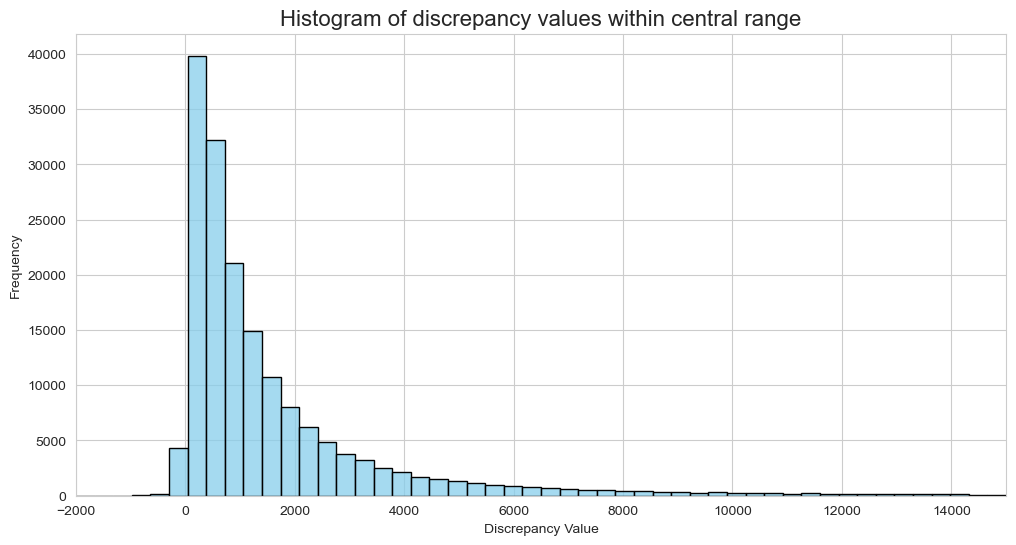

In [32]:
# Create the histogram

central_range = (-2000,15000)
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.histplot(inventory['Discrepancy_Value'], bins=50, kde=False, color='skyblue', edgecolor='black', binrange=central_range)
plt.title('Histogram of discrepancy values within central range', fontsize=16)
plt.xlabel('Discrepancy Value')
plt.ylabel('Frequency')
plt.xlim(central_range)
plt.show()

In [33]:
# Identify the top 5 products with positive discrepancy value

top_positive_discrepancies = inventory[inventory['Discrepancy_Value'] > 0].sort_values(by='Discrepancy_Value', ascending=False).head(10)
positive_detailed_view = top_positive_discrepancies[['InventoryId', 'Description', 'Store', 'Brand', 'City_end', 'Discrepancy', 'Discrepancy_Value_Dollars']]

positive_detailed_view

,InventoryId,Description,Store,Brand,City_end,Discrepancy,Discrepancy_Value_Dollars
118538,50_MOUNTMEND_1233,Jack Daniels No 7 Black,50,1233,MOUNTMEND,8428.0,"$294,895.72"
195379,76_DONCASTER_3405,Tito's Handmade Vodka,76,3405,DONCASTER,9542.0,"$276,622.58"
120118,50_MOUNTMEND_8068,Absolut 80 Proof,50,8068,MOUNTMEND,9285.0,"$218,104.65"
79283,34_PITMERDEN_3545,Ketel One Vodka,34,3545,PITMERDEN,7119.0,"$213,498.81"
195432,76_DONCASTER_3545,Ketel One Vodka,76,3545,DONCASTER,7100.0,"$212,929.00"
79227,34_PITMERDEN_3405,Tito's Handmade Vodka,34,3405,PITMERDEN,7087.0,"$205,452.13"
159363,66_EANVERNESS_3405,Tito's Handmade Vodka,66,3405,EANVERNESS,7040.0,"$204,089.60"
185813,73_DONCASTER_3545,Ketel One Vodka,73,3545,DONCASTER,6613.0,"$198,323.87"
80298,34_PITMERDEN_8068,Absolut 80 Proof,34,8068,PITMERDEN,8241.0,"$193,581.09"
185758,73_DONCASTER_3405,Tito's Handmade Vodka,73,3405,DONCASTER,6638.0,"$192,435.62"


In [34]:
# Identify the top 10 products with negative discrepancy value

top_negative_discrepancies = inventory[inventory['Discrepancy_Value'] < 0].sort_values(by='Discrepancy_Value').head(10)
negative_detailed_view = top_negative_discrepancies[['InventoryId', 'Description', 'Store', 'Brand', 'City_end', 'Discrepancy', 'Discrepancy_Value_Dollars']]

negative_detailed_view

,InventoryId,Description,Store,Brand,City_end,Discrepancy,Discrepancy_Value_Dollars
168049,67_EANVERNESS_35464,Stags Leap WC Artemis Cab,67,35464,EANVERNESS,-125.0,"$-6,123.75"
162888,66_EANVERNESS_35464,Stags Leap WC Artemis Cab,66,35464,EANVERNESS,-90.0,"$-4,409.10"
118742,50_MOUNTMEND_2209,Pendleton 1910 Rye,50,2209,MOUNTMEND,-222.0,"$-3,993.78"
192217,74_PAENTMARWY_35464,Stags Leap WC Artemis Cab,74,35464,PAENTMARWY,-72.0,"$-3,527.28"
79560,34_PITMERDEN_4225,Goslings Black Seal Rum 80,34,4225,PITMERDEN,-128.0,"$-3,326.72"
156686,64_CESTERFIELD_35464,Stags Leap WC Artemis Cab,64,35464,CESTERFIELD,-60.0,"$-2,939.40"
1021,1_HARDERSFIELD_4225,Goslings Black Seal Rum 80,1,4225,HARDERSFIELD,-107.0,"$-2,780.93"
100425,41_LARNWICK_35464,Stags Leap WC Artemis Cab,41,35464,LARNWICK,-55.0,"$-2,694.45"
167832,67_EANVERNESS_31083,Stags Leap WC Karia Chard,67,31083,EANVERNESS,-90.0,"$-2,609.10"
67578,30_CULCHETH_4225,Goslings Black Seal Rum 80,30,4225,CULCHETH,-99.0,"$-2,573.01"






<font color='red'>

## Results of Discrepancy Analysis
    
</font>

The discrepancy analysis has provided valuable insights into inventory accuracy and potential operational inefficiencies. For the top 10 products with a positive discrepancy, where actual inventory is less than expected, it's crucial to investigate discrepancies that may indicate unrecorded sales, stock losses, or other issues affecting inventory accuracy. Immediate actions should include reviewing sales recording practices, assessing theft or loss, and evaluating demand forecasting accuracy. 

Conversely, the top 10 products with a negative discrepancy, where actual inventory exceeds expectations, suggest potential overstocking or underreporting of sales. For these items, we recommend analyzing purchasing practices, reassessing demand forecasting, and improving inventory tracking systems. By addressing these discrepancies, the company can improve inventory accuracy, enhance financial reporting, and optimize stock levels, leading to better operational efficiency and customer satisfaction.







<font color='Blue'>

## 6. Recommended Inventory Level
    
</font>

In [35]:
# Select top 20 products
top_20_critical = inventory.groupby(['InventoryId', 'Description'])['Total_Sold'].sum().sort_values(ascending=False).head(20)

top_20_critical

InventoryId          Description                 
1_HARDERSFIELD_8111  Smirnoff 80 Proof               1142.0
10_HORNSEY_8111      Smirnoff 80 Proof               1104.0
34_PITMERDEN_4261    Capt Morgan Spiced Rum          1055.0
53_HILLFAR_8111      Smirnoff 80 Proof                939.0
10_HORNSEY_4157      Smirnoff Green Apple Vodka       927.0
10_HORNSEY_1892      Yukon Jack                       921.0
27_MOUNTMEND_8111    Smirnoff 80 Proof                909.0
10_HORNSEY_5491      Rumpleminze                      905.0
14_BROMWICH_1892     Yukon Jack                       854.0
14_BROMWICH_4261     Capt Morgan Spiced Rum           850.0
34_PITMERDEN_3545    Ketel One Vodka                  843.0
10_HORNSEY_4261      Capt Morgan Spiced Rum           836.0
10_HORNSEY_3606      Smirnoff Raspberry Vodka         821.0
34_PITMERDEN_8111    Smirnoff 80 Proof                812.0
77_TAMWORTH_5111     Dr McGillicuddy's Mentholmnt     811.0
15_WANBORNE_8068     Absolut 80 Proof             

In [36]:
# Extract Inventory id for top 20 products

top_20_critical_inventory_ids = top_20_critical.index.get_level_values('InventoryId').tolist()
# top_20_critical_inventory_ids

In [37]:
# Ensuring date format for relevant columns

purchase['PODate'] = pd.to_datetime(purchase['PODate'])
purchase['ReceivingDate'] = pd.to_datetime(purchase['ReceivingDate'])
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

In [38]:
# Calculate the ads for the top 20 products

total_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days
ads = sales[sales['InventoryId'].isin(top_20_critical_inventory_ids)].groupby('InventoryId')['SalesQuantity'].sum() / total_days
ads

InventoryId
10_HORNSEY_1892        15.610169
10_HORNSEY_3606        13.915254
10_HORNSEY_4135        12.932203
10_HORNSEY_4157        15.711864
10_HORNSEY_4261        14.169492
10_HORNSEY_5491        15.338983
10_HORNSEY_8053        13.288136
10_HORNSEY_8111        18.711864
14_BROMWICH_1892       14.474576
14_BROMWICH_4261       14.406780
15_WANBORNE_8068       13.728814
1_HARDERSFIELD_3609    13.169492
1_HARDERSFIELD_8111    19.355932
27_MOUNTMEND_1892      13.491525
27_MOUNTMEND_8111      15.406780
34_PITMERDEN_3545      14.288136
34_PITMERDEN_4261      17.881356
34_PITMERDEN_8111      13.762712
53_HILLFAR_8111        15.915254
77_TAMWORTH_5111       13.745763
Name: SalesQuantity, dtype: float64

In [39]:
# Calculate the average lead time for top 20 products
purchase['LeadTime'] = (purchase['ReceivingDate'] - purchase['PODate']).dt.days
average_lt = purchase[purchase['InventoryId'].isin(top_20_critical_inventory_ids)].groupby('InventoryId')['LeadTime'].mean()

average_lt

InventoryId
10_HORNSEY_1892        8.105263
10_HORNSEY_3606        8.258621
10_HORNSEY_4135        7.900000
10_HORNSEY_4157        7.963636
10_HORNSEY_4261        7.676190
10_HORNSEY_5491        7.939394
10_HORNSEY_8053        8.152778
10_HORNSEY_8111        7.961538
14_BROMWICH_1892       6.492063
14_BROMWICH_4261       6.612903
15_WANBORNE_8068       7.339623
1_HARDERSFIELD_3609    7.869565
1_HARDERSFIELD_8111    8.317460
27_MOUNTMEND_1892      7.658228
27_MOUNTMEND_8111      7.597938
34_PITMERDEN_3545      6.971154
34_PITMERDEN_4261      6.990909
34_PITMERDEN_8111      7.275510
53_HILLFAR_8111        7.656863
77_TAMWORTH_5111       7.629213
Name: LeadTime, dtype: float64

In [40]:
# Create a DataFrame to store the results

recommended_stock_levels = pd.DataFrame(columns=['InventoryId', 'Reorder_Point'])


In [41]:
# Loop through each top 20 products

for inventory_id in top_20_critical_inventory_ids:
    prodcuts_ads = ads.loc[inventory_id] if inventory_id in ads.index else 0
    product_lt = average_lt.loc[inventory_id] if inventory_id in average_lt.index else 0
    
    # Calculate the reorder point
    product_rop = prodcuts_ads * product_lt
    
    # Append the result to the DataFrame
    
    recommended_stock_levels = recommended_stock_levels._append({
        'InventoryId' : inventory_id,
        'Reorder_Point' : product_rop
    }, ignore_index=True)
    
recommended_stock_levels

,InventoryId,Reorder_Point
0,1_HARDERSFIELD_8111,160.992198
1,10_HORNSEY_8111,148.975228
2,34_PITMERDEN_4261,125.006934
3,53_HILLFAR_8111,121.860917
4,10_HORNSEY_4157,125.123575
5,10_HORNSEY_1892,126.524532
6,27_MOUNTMEND_8111,117.059759
7,10_HORNSEY_5491,121.782229
8,14_BROMWICH_1892,93.969868
9,14_BROMWICH_4261,95.270640


In [42]:
# Merge the recommended Reorder Point data with the ending inventory from inventory DataFrame
comparison = recommended_stock_levels.merge(inventory[['InventoryId', 'onHand_end']], on='InventoryId', how='left')

# Calculate difference between Reorder Point and actual ending inventory
comparison['Difference'] = comparison['onHand_end'] - comparison['Reorder_Point']

comparison_sorted = comparison.sort_values('Difference')

comparison_sorted


,InventoryId,Reorder_Point,onHand_end,Difference
9,14_BROMWICH_4261,95.270640,71.0,-24.270640
5,10_HORNSEY_1892,126.524532,110.0,-16.524532
17,10_HORNSEY_8053,108.335217,96.0,-12.335217
12,10_HORNSEY_3606,114.920807,141.0,26.079193
13,34_PITMERDEN_8111,100.130751,133.0,32.869249
4,10_HORNSEY_4157,125.123575,212.0,86.876425
19,10_HORNSEY_4135,102.164407,191.0,88.835593
15,15_WANBORNE_8068,100.764311,199.0,98.235689
11,10_HORNSEY_4261,108.767716,223.0,114.232284
16,27_MOUNTMEND_1892,103.321176,247.0,143.678824


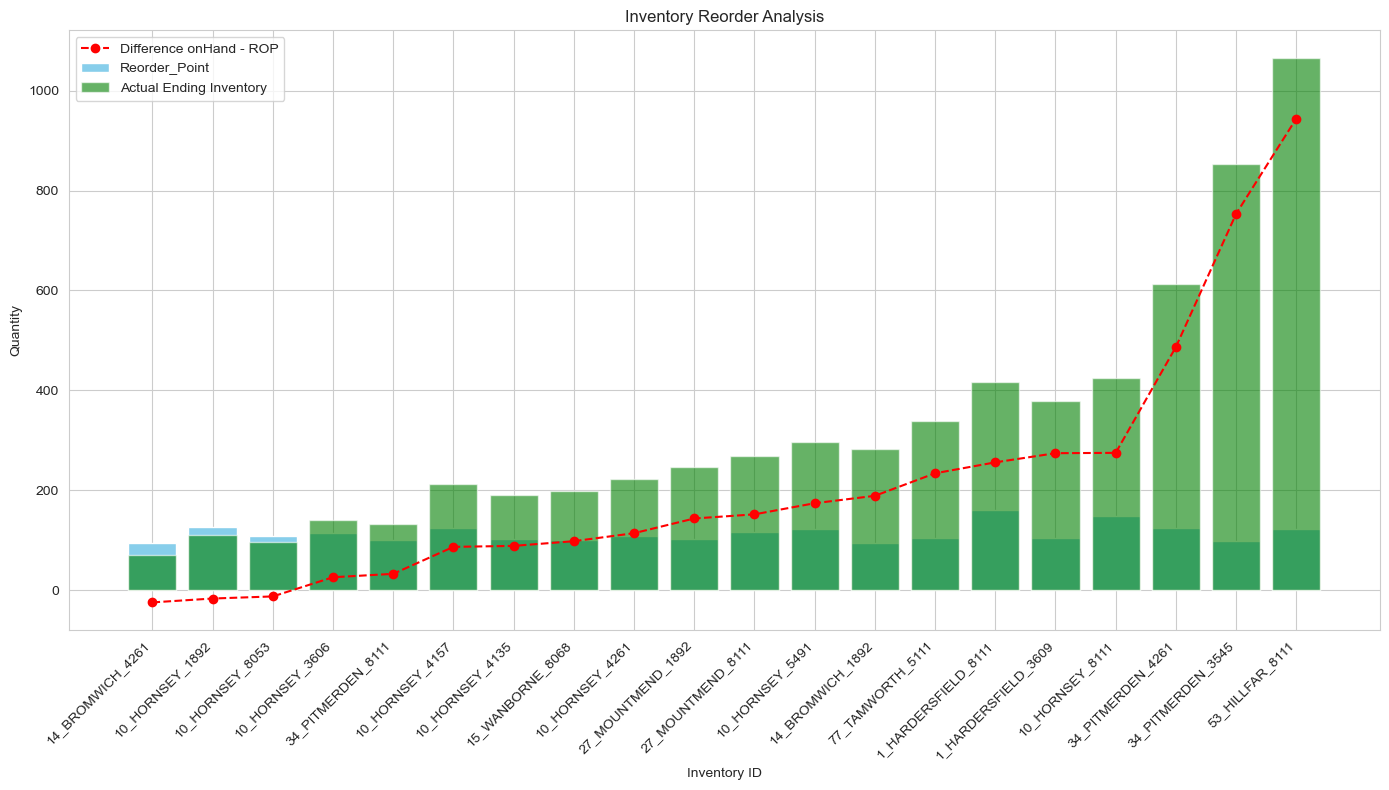

In [43]:
# Visualization of Comparison
plt.figure(figsize=(14,8))

# Reorder Point
plt.bar(comparison_sorted['InventoryId'], comparison_sorted['Reorder_Point'], color='skyblue', label='Reorder_Point')

# Actual Ending Inventory
plt.bar(comparison_sorted['InventoryId'], comparison_sorted['onHand_end'], color='green', label='Actual Ending Inventory', alpha=0.6)

# Overlay difference as a line
plt.plot(comparison_sorted['InventoryId'], comparison_sorted['Difference'], color='red', marker='o', linestyle='dashed', label='Difference onHand - ROP')

plt.xlabel('Inventory ID')
plt.ylabel('Quantity')
plt.title('Inventory Reorder Analysis')
plt.xticks(rotation = 45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# Calculation of EOQ

## Ensuring date format for relevant columns
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
purchase['ReceivingDate'] = pd.to_datetime(purchase['ReceivingDate'])

In [45]:
# Calculation of EOQ

# Calculate total sales days for ADS calculation (1 year of calculation)
total_sales_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days
# Assuming holding cost as percentage of unit cost (e.g. 10%)
holding_cost_percentage = 0.20
# Assuming an estimated order cost as 50
order_cost_per_order = 50



# Identify from top 20 products the products that have an inventory lower than the reorder point
products_to_reorder = comparison[comparison['Difference'] < 0]

# Filter sales and purchases data from top 20 products the products that have an inventory lower than the reorder point
sales_top20 = sales[sales['InventoryId'].isin(products_to_reorder['InventoryId'])]
purchase_top20 = purchase[purchase['InventoryId'].isin(products_to_reorder['InventoryId'])]

# Calculate the average unit cost and annual demand for top 20 products
average_unit_cost = purchase_top20.groupby('InventoryId')['PurchasePrice'].mean()
annual_demand = sales_top20.groupby('InventoryId')['SalesQuantity'].sum()
# Calculate then holding cost per unit
holding_cost_per_unit = average_unit_cost * holding_cost_percentage

# print(annual_demand)


# Calculate the EOQ
def calculate_eoq(demand, order_cost, holding_cost):
    if demand > 0 and holding_cost > 0:
        return np.sqrt((2 * demand * order_cost) / holding_cost)
    else:
        return 0
    
# Calculate EOQ for top 20 products that need reorder
eoq_values = {}
for inventory_id in products_to_reorder['InventoryId']:
    demand = annual_demand.get(inventory_id, 0)
    holding_cost = holding_cost_per_unit.get(inventory_id, 0)
    eoq = calculate_eoq(demand, order_cost_per_order, holding_cost)
    eoq_values[inventory_id] = eoq


# Convert the data in a DataFrame and display
eoq_df = pd.DataFrame(list(eoq_values.items()), columns=['InventoryId', 'EOQ'])
eoq_df




,InventoryId,EOQ
0,10_HORNSEY_1892,799.739541
1,14_BROMWICH_4261,162.121068
2,10_HORNSEY_8053,722.956891
